# Practice 9 - kNN, Decision Tree, SVM

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

**Loading the data set from Scikit-Learn**

In [2]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [3]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

**Getting a description of the data set**

In [4]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [5]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [7]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


**To make the target encoding more obvious (we want to predict the risk of cancer), we invert the encoding values so that now 0 codes benign and 1 codes malignant**

In [8]:
target = target.replace({0:1, 1:0})
target.sample(n=8, random_state=1)

,tumor type
421,0
47,1
292,0
186,1
414,1
132,1
161,1
197,1


## Subject

We consider two predictors: mean radius and mean texture.
* Train a k-NN with k=5 and plot the decision areas based on that model.
* Explore different values of k to determine an optimal value.
* Train a Decision Tree and plot the decision areas based on that model.
* What would be an optimal value for the depth of the Decision Tree? Hint: you can use parameter max_depth of DecisionTreeClassifier.
* Train a Random Forest and plot the decision areas based on that model.
* Train a SVM and plot the decision areas based on that model.
* Compare the performance between all that models.

In [11]:
# train a k-NN with k=5 and plot the decision areas based on that model

from sklearn.model_selection import train_test_split

In [12]:
X = features[['mean radius', 'mean texture']].values

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target['tumor type'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
print('X-train set: ', X_train.shape, 'y-train set: ', y_train.shape)
print('X-test set: ', X_test.shape, 'y-test set: ', y_test.shape)

X-train set:  (426, 2) y-train set:  (426,)
X-test set:  (143, 2) y-test set:  (143,)


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Functions

from matplotlib.colors import ListedColormap

def fig_dec_areas(classifier):
    fig = plt.figure(figsize=(8,5), dpi= 70)
    X_set, y_set = sc.inverse_transform(X_test), label_encoder.inverse_transform(y_test)
    labels = ['benign', 'malignant']
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.1),
                         np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 1))
    plt.contourf(X1, X2, classifier['classifier'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('lightgreen', 'salmon')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(1-i), label = labels[j])
    plt.title('Tumor type (test data), classifier: ' + str(classifier['classifier']))
    plt.xlabel('Mean radius')
    plt.ylabel('Mean texture')
    plt.legend()
    plt.show()

In [19]:
def fit_and_compute_score(classifier):
    classifier['classifier'].fit(X_train, y_train)
    classifier['score'] = classifier['classifier'].score(X_test,y_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def acc_prec_rec(classifier):
    classifier['y_pred'] = classifier['classifier'].predict(X_test)
    print('-----------')
    print(str(classifier['classifier']))
    print('-----------')
    print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, classifier['y_pred']),2)))
    print('Precision (proportion of true malignant among malignant predictions) is ' + str(round(precision_score(y_test, classifier['y_pred']),2)))
    print('Recall (proportion of malignant tumors that are correctly predicted) is ' + str(round(recall_score(y_test, classifier['y_pred']),2)))

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(classifier_list):
    plt.subplots(1, figsize=(8,8))
    plt.title('Receiver Operating Characteristic')
    colors = ListedColormap(('red', 'green', 'blue', 'pink', 'yellow'))
    
    for i, classifier in enumerate(classifier_list):
        classifier['y_proba'] = classifier['classifier'].predict_proba(X_test)
        classifier['y_score'] = classifier['y_proba'][:,1]
        
        false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, classifier['y_score'])
        plt.plot(false_positive_rate, true_positive_rate, c=colors(i), linewidth=2, label=classifier['classifier'])

    # Plot ROC curve for a random classifier
    plt.plot([0, 1], ls='--', c='grey', label='Random classifier')
    plt.xlim([-0.001, 1])
    plt.ylim([0, 1.001])
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.legend()
    plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = {'classifier': KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)}
fit_and_compute_score(knn)

In [23]:
(score, neigh) = (knn['score'], 5)
(score, neigh)

(0.8671328671328671, 5)

In [24]:
np.sqrt(426)

20.639767440550294

In [25]:
# The ideal value for number of numbers should be square root of number of samples

In [27]:
knn['classifier'].score(X_test, y_test)

0.8671328671328671

In [28]:
for i in range(10, 30):
    knn = {'classifier': KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p=2)}
    fit_and_compute_score(knn)
    if knn['score'] > score:
        score = knn['score']
        neigh = i
    

In [29]:
(score, neigh)

(0.916083916083916, 28)

In [34]:
knn = {'classifier': KNeighborsClassifier(n_neighbors = neigh, metric = 'minkowski', p=2)}
fit_and_compute_score(knn)

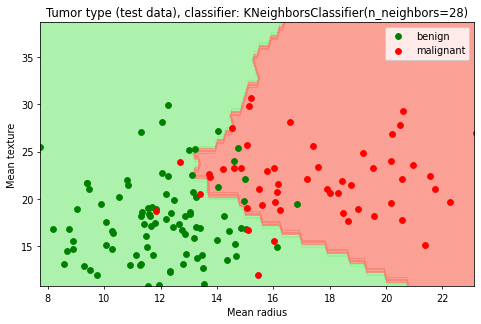

In [35]:
fig_dec_areas(knn)

In [38]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 5)}
fit_and_compute_score(dt)

In [39]:
(score, depth) = (dt['score'], 5)
(score, depth)

(0.8881118881118881, 5)

In [45]:
for i in range(2, 10):
    dt = {'classifier': DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=i )}
    fit_and_compute_score(dt)
    if dt['score'] > score:
        score = dt['score']
        depth = i

In [46]:
(score, depth)

(0.8951048951048951, 7)

In [47]:
dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=depth)}
fit_and_compute_score(dt)

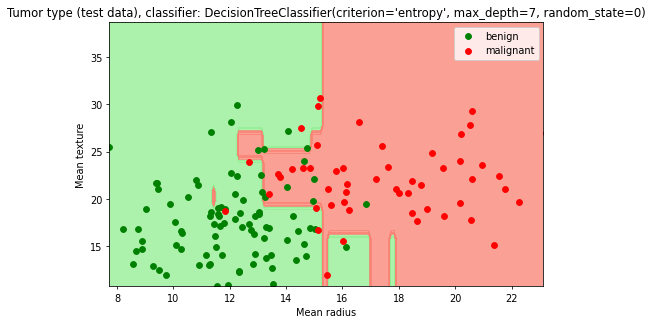

In [48]:
fig_dec_areas(dt)

In [49]:
# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = {'classifier':RandomForestClassifier(n_estimators = 5)}
fit_and_compute_score(rf)

In [52]:
(score, estim) = (rf['score'], 5)
(score, estim)

(0.8601398601398601, 5)

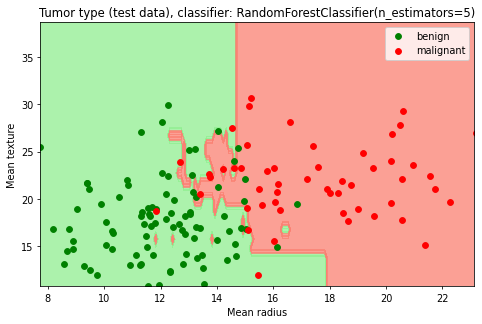

In [53]:
fig_dec_areas(rf)

In [54]:
# SVM

In [58]:
from sklearn.svm import SVC
svm = {'classifier': SVC(kernel = 'linear', random_state = 0, probability = True)}
fit_and_compute_score(svm)

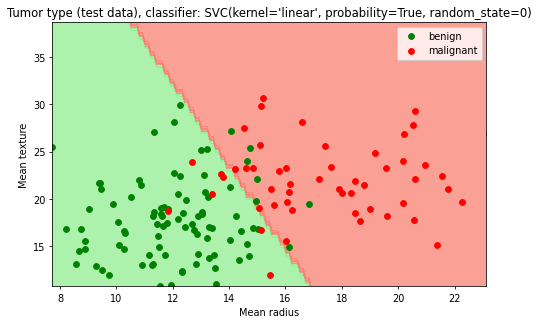

In [59]:
fig_dec_areas(svm)

In [60]:
# Comparison of the performance

In [62]:
classifiers = [knn, dt, rf, svm]

for classifier in classifiers:
    acc_prec_rec(classifier)

-----------
KNeighborsClassifier(n_neighbors=28)
-----------
Accuracy (proportion of correct predictions) is 0.92
Precision (proportion of true malignant among malignant predictions) is 0.89
Recall (proportion of malignant tumors that are correctly predicted) is 0.89
-----------
DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)
-----------
Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true malignant among malignant predictions) is 0.87
Recall (proportion of malignant tumors that are correctly predicted) is 0.85
-----------
RandomForestClassifier(n_estimators=5)
-----------
Accuracy (proportion of correct predictions) is 0.86
Precision (proportion of true malignant among malignant predictions) is 0.8
Recall (proportion of malignant tumors that are correctly predicted) is 0.83
-----------
SVC(kernel='linear', probability=True, random_state=0)
-----------
Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true

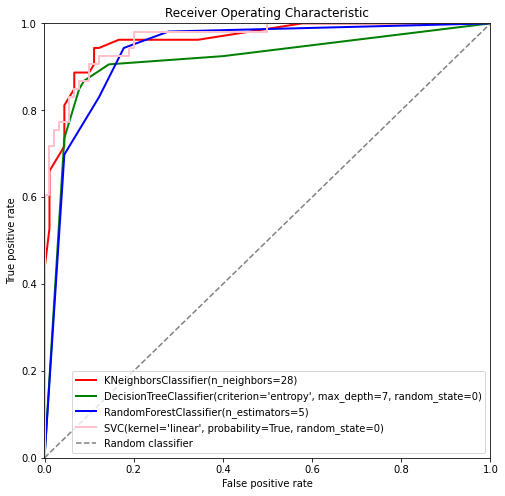

In [63]:
plot_roc(classifiers)

In [64]:
# AUC for all the classifiers

print('AUC for k-NN: ', roc_auc_score(y_test, knn['y_score']))
print('AUC for Decision Tree: ', roc_auc_score(y_test, dt['y_score']))
print('AUC for Random Forest: ', roc_auc_score(y_test, rf['y_score']))
print('AUC for SVM: ', roc_auc_score(y_test, svm['y_score']))

AUC for k-NN:  0.9613207547169811
AUC for Decision Tree:  0.9127882599580712
AUC for Random Forest:  0.9358490566037736
AUC for SVM:  0.9647798742138365
